In [2]:
import torch
import torch.utils.data
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os
GPU = torch.cuda.is_available()

In [43]:
# Grab data from csv
df = pd.read_csv('aps360_airbnb1.csv', index_col=False)

In [44]:
# Cleaning Data
df_cols = list(df.columns)
df_cols.remove('price')
df_cols.remove('Unnamed: 56')
df_cols.remove('Unnamed: 0')
df_cols.append('price')
df = df[df_cols]

input_features = len(df_cols) - 1
print(input_features)
print(len(df))

95
3793


In [5]:
# turn data into 
datanp = df.values.astype(np.float32)
np.random.seed(50) # set the numpy seed for consistent split

# Data split count (train/valid/test): 2276/758/759
train_set = np.random.choice(range(3793), 2276, replace=False)
train_set.sort()
valid_set = np.random.choice([i for i in range(3793) if i not in train_set], 758, replace=False)
valid_set.sort()
test_set = [i for i in range(3793) if i not in train_set and i not in valid_set]

train_set = datanp[train_set]
valid_set = datanp[valid_set]
test_set = datanp[test_set]

separator = torch.from_numpy(np.array(range(input_features)))

# Groups of Data
- host_is_superhost 
- guests_included
- bathrooms 
- bedrooms 
- beds 
- cleaning_fee 
- instant_bookable 

Residence Areas
- ballard
- beacon_hill 
- capitol_hill
- cascade 
- central_area 
- delridge 
- downtown 
- interbay
- lake_city
- magnolia
- northgate
- other_neighborhoods
- queen_anne 
- rainier_valley
- seward_park
- university_district
- west_seattle

AirBnB Type
- Apartment
- Bed & Breakfast
- Boat
- Bungalow
- Cabin
- Camper/RV
- Chalet 
- Condominium
- Dorm
- House
- Loft
- Other
- Tent
- Townhouse
- Treehouse
- Yurt

Living Style
- Entire home/apt
- Private room
- Shared room

Bed Type
- Airbed
- Couch
- Futon
- Pull-out Sofa
- Real Bed

Cancellation Policy
- flexible
- moderate
- strict 

Location
- location_x
- location_y
- location_z

Ameneties
- 24-hour_check-in
- air_conditioning
- breakfast 
- buzzer/wireless_intercom
- cable_tv
- carbon_monoxide_detector 
- cat(s)
- dog(s)
- doorman 
- dryer
- elevator_in_building
- essentials
- family/kid_friendly
- fire_extinguisher
- first_aid_kit
- free_parking_on_premises
- gym
- hair_dryer
- hangers
- heating
- hot_tub
- indoor_fireplace
- internet
- iron
- kitchen
- laptop_friendly_workspace
- lock_on_bedroom_door
- other_pet(s)
- pets_allowed
- pets_live_on_this_property
- pool
- safety_card
- shampoo
- smoke_detector
- smoking_allowed
- suitable_for_events
- tv
- washer
- washer_/_dryer
- wheelchair_accessible
- wireless_internet

In [31]:
corr = df.corr().loc[['price'],:]
corr_cols = list(corr.columns)
corr_cols.remove('price')
corr = corr[corr_cols]

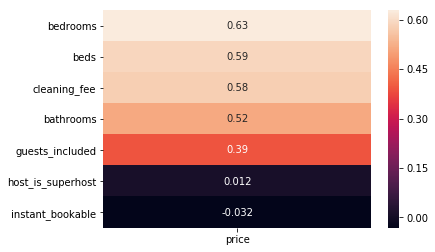

In [27]:
# General Information
genInfo = corr.iloc[:,0:7]
sns.heatmap(genInfo.sort_values(by='price', axis = 1, ascending = False).T, annot=True)

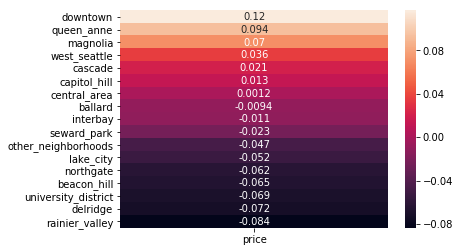

In [28]:
# Most Popular Residence
comm = corr.iloc[:,7:24]
sns.heatmap(comm.sort_values(by='price', axis = 1, ascending = False).T, annot=True)

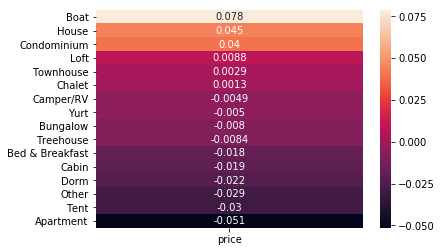

In [29]:
housing = corr.iloc[:,24:40]
sns.heatmap(housing.sort_values(by='price', axis = 1, ascending = False).T, annot=True)

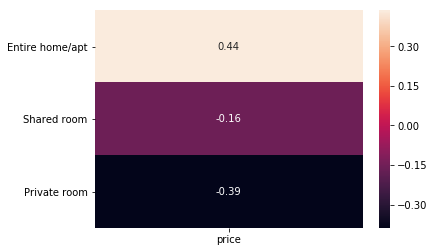

In [33]:
style = corr.iloc[:,40:43]
sns.heatmap(style.sort_values(by='price', axis = 1, ascending = False).T, annot = True)

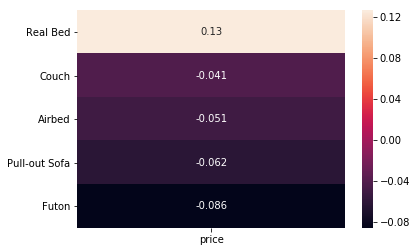

In [39]:
bed = corr.iloc[:,43:48]
sns.heatmap(bed.sort_values(by='price', axis = 1, ascending = False).T, annot = True)

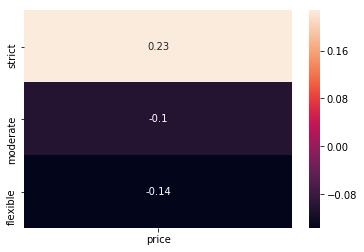

In [40]:
cancellation = corr.iloc[:,48:51]
sns.heatmap(cancellation.sort_values(by='price', axis = 1, ascending = False).T, annot = True)

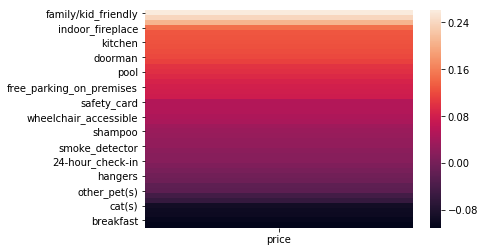

In [42]:
ameneties = corr.iloc[:,51:]
sns.heatmap(ameneties.sort_values(by='price', axis = 1, ascending = False).T)